Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Your code should run from top to bottom with no errors. Failure to do this will result in loss of points.

You should not use `install.packages()` anywhere. You may assume that we have already installed all the packages needed to run your code.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and delete the `stop()` functions, as well as your name and collaborators below:

In [3]:
NAME = "aayushap"  # your uniqname 
COLLABORATORS = c("pjmerica", "sohumm", "kaspersj")  # vector of uniqnames of your collaborators, if any
## IMPORTANT: you must also have set your group on Canvas. This is only used as a backup.

---

In [46]:
library(tidyverse)
library(nycflights13)

# STATS 306
## Problem Set 3: Data Manipulation II
These questions again focus on the `flights` dataset. Each question is worth two points, for a total of 20.

Problems 1-3 are based on the `billionaires` dataset that we discussed in Lecture 06. Assume citizenship equals country throughout.

In [47]:
load("bil.RData")
print(bil)

# A tibble: 2,614 x 22
     age category  citizenship company.name company.type `country code` founded
   <int> <chr>     <chr>       <chr>        <chr>        <chr>            <int>
 1    NA Financial Saudi Arab… Rolaco Trad… new          SAU               1968
 2    34 Financial United Sta… Fidelity In… new          USA               1946
 3    59 Non-Trad… Brazil      Companhia B… new          BRA               1948
 4    61 New Sect… Germany     Ratiopharm   new          DEU               1881
 5    NA Financial Hong Kong   Swire        new          HKG               1816
 6    NA Traded S… Bahrain     YBA Kanoo    new          BHR               1890
 7    NA New Sect… Japan       Otsuka Hold… new          JPN               1921
 8    NA Traded S… Japan       Sony         new          JPN               1946
 9    66 Financial Japan       Mori Buildi… new          JPN               1959
10    NA Traded S… France      Chanel       new          FRA               1909
# ... with 2,604 

#### Problem 1
In which country are billionaires oldest on average? Youngest? Do not count any country which has less than five observations. Store your answers in variables `oldest1` and `youngest1`, respectively.

In [48]:
oldest1 <- bil %>%
  group_by(citizenship) %>%
  summarise(avg = mean(age, na.rm = TRUE), n = n()) %>%
  filter(n >= 5) %>%
  arrange(desc(avg)) %>%
  top_n(1, avg) %>%
  select(citizenship)

youngest1 <- bil %>%
  group_by(citizenship) %>%
  summarise(avg = mean(age, na.rm = TRUE), n = n()) %>%
  filter(n >= 5) %>%
  arrange(avg) %>%
  top_n(1, desc(avg)) %>%
  select(citizenship)

oldest1
youngest1

citizenship
Portugal


citizenship
United Arab Emirates


In [ ]:
stopifnot(exists("oldest1"))
stopifnot(exists("youngest1"))

#### Problem 2
Each billionaire has a `category` indicating how they made their fortune. The overall distribution of categories is:

In [49]:
table(bil$category)


            energy            Finance          Financial        New Sectors 
                 1                  1                800                319 
Non-Traded Sectors   Resource Related     Traded Sectors           Trucking 
               597                245                564                  1 

Group the billionaires into three age brackets: "40 and under", "41 to 65", and "above 65". (There are just 77 billionaires aged 40 and under, for example.) What is the most common category of billionaire in each of the three age brackets? Store your answer in `table2`. The table should have three rows (one per category) and three columns: `age_bracket`, `most_common_category` and `n`, the number of billionaires in the most common category.

In [52]:
temp2=bil  %>% group_by(category)%>% select(age) %>% 
        summarize(a=sum( age < 40,na.rm=1), b=sum(age >= 40&age <66 ,na.rm=1), c=sum(age>65,na.rm=1)) %>%
filter( a==max(a,na.rm=1)|b==max(b,na.rm=1)|c==max(c,na.rm=1)) %>% gather('a','b','c',key="age_bracket",value="n" ) 
temp2

table2=temp2[c(2,3,5),] %>%mutate(most_common_category=category,age_bracket=c( "40 and under", "41 to 65", "above 65"),n=n) %>% 
select(age_bracket,n,most_common_category)
table2


Adding missing grouping variables: `category`


category,age_bracket,n
Financial,a,17
New Sectors,a,27
Financial,b,352
New Sectors,b,185
Financial,c,317
New Sectors,c,75


age_bracket,n,most_common_category
40 and under,27,New Sectors
41 to 65,352,Financial
above 65,317,Financial


In [ ]:
stopifnot(exists("table2"))

#### Problem 3
Define a country's "gender gap" to be the difference in the percentage of male and female billionaires. (Hence, it is equal to zero if the country has exactly equal numbers of male and female billionaires.) 

Only one country has an equal number of male and female billionaires. The average gender gap across all countries is 0.85. If we plot countries according to their deviation from 0 (parity), grouping the 38 countries with no female billionaires into a single category, we obtain the following plot:

![plot3](plot3.png)

Recreate this plot.

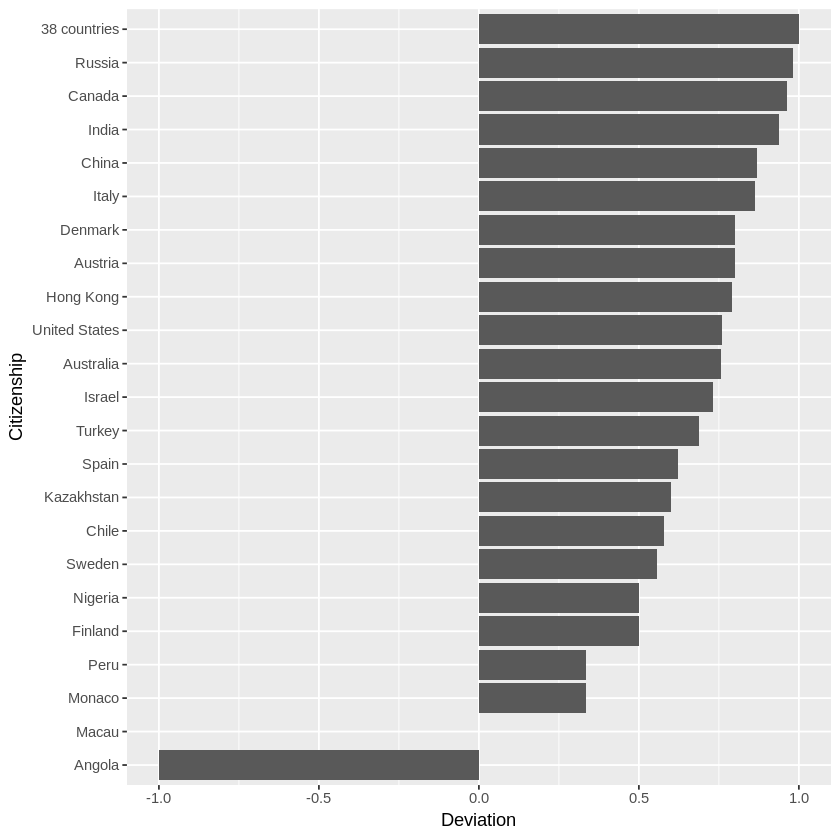

In [54]:
with_female <- bil %>% group_by(citizenship) %>%
summarize(num_male = sum(gender == "male"), obs = n(), num_female = sum(gender == "female"), num_na = sum(is.na(gender))) %>%
filter(num_na == 0) %>%
mutate(deviation = (num_male - num_female) / obs) %>%
filter(num_female != 0) %>% select(deviation, citizenship)

no_female <- bil %>% filter(!is.na(gender)) %>% group_by(citizenship) %>%
summarize(num_male = sum(gender == "male", na.rm = T), obs = n()) %>%
mutate(num_female = obs - num_male, deviation = (num_male - num_female) / obs) %>%
filter(num_female == 0) %>% select(citizenship, obs, num_male, num_female, deviation) %>%
group_by(deviation) %>% summarize(citizenship = paste0("38 countries"))

bar = rbind(with_female, no_female)
bar %>% ggplot() + geom_bar(mapping = aes(x = reorder(citizenship, deviation), y = deviation), position = "dodge", stat = "identity") +
coord_flip() +   xlab("Citizenship") + ylab("Deviation") 


#### Problem 4
Recall that each airplane has a unique tail number given by `tailnum`. Find the tail number of the airplane which flew to the largest number of *unique* destinations from any of the the three departure airports in `flights`. Store the string containing this tail number in a variable called `most_dests`.

In [55]:
table4=flights %>% group_by(tailnum) %>% select(dest) 
table4=unique(table4[,c("tailnum","dest")]) %>% summarise(n=sum(tailnum==tailnum)) %>%arrange(desc(n))
most_dests=table4[1,]$tailnum

most_dests = flights %>%
  filter(!is.na(tailnum)) %>%
  group_by(tailnum) %>%
  summarize(n = n_distinct(dest)) %>%
  top_n(1, n)
most_dests


Adding missing grouping variables: `tailnum`


tailnum,n
N11194,47


In [ ]:
stopifnot(exists("most_dests"))


#### Problem 5
The following code adds a variable `week` to `flights`, such that `week==1` for the first seven days of the year, `week==2` for days 8-14, etc. (In the second half of the semester we will learn how to manipulate dates using the `lubridate` package.)

In [56]:
flights_week = mutate(flights, week=lubridate::week(time_hour))

Let a flight's "positive arrival delay" be defined as the larger of `arr_delay` and zero. We say a flight is *ridiculously late* if its arrival delay was more than ten times the average positive arrival delay for all flights in that week.
- Use the `flights_week` table to calculate the number of ridiculously late flights in each week of the year. For example, in the first week of the year there were 81 ridiculously late flights.
- Also add in the total number of flights in the data set for each week. 

Sort the resulting table in descending order of the number of ridiculously late flights and store it in a variable called `table5`. The table should have three columns, `week`, `n`, and `n_ridiculously_late`.

In [58]:
flights_week = mutate(flights, week=lubridate::week(time_hour))

table5 <- flights_week %>%
  mutate(pos_delay = ifelse(arr_delay< 0, 0, arr_delay)) %>%
  group_by(week) %>%
  summarize(n = n(), n_ridiculously_late = sum(arr_delay > 10 * mean(pos_delay, na.rm = TRUE), na.rm = TRUE)) %>%
  arrange(desc(n_ridiculously_late))
print(table5)


# A tibble: 53 x 3
    week     n n_ridiculously_late
   <dbl> <int>               <int>
 1    40  6528                 186
 2    36  6427                 183
 3    13  6542                 173
 4    18  6522                 162
 5    38  6509                 161
 6    39  6517                 150
 7    34  6614                 142
 8    35  6209                 130
 9    46  6517                 130
10    37  6474                 129
# ... with 43 more rows


In [ ]:
stopifnot(exists("table5"))

#### Problem 6
Use your solution in part 5
to generate a bar plot of the number of ridiculously late flights each week. Give your plot an appropriate title and axis labels.

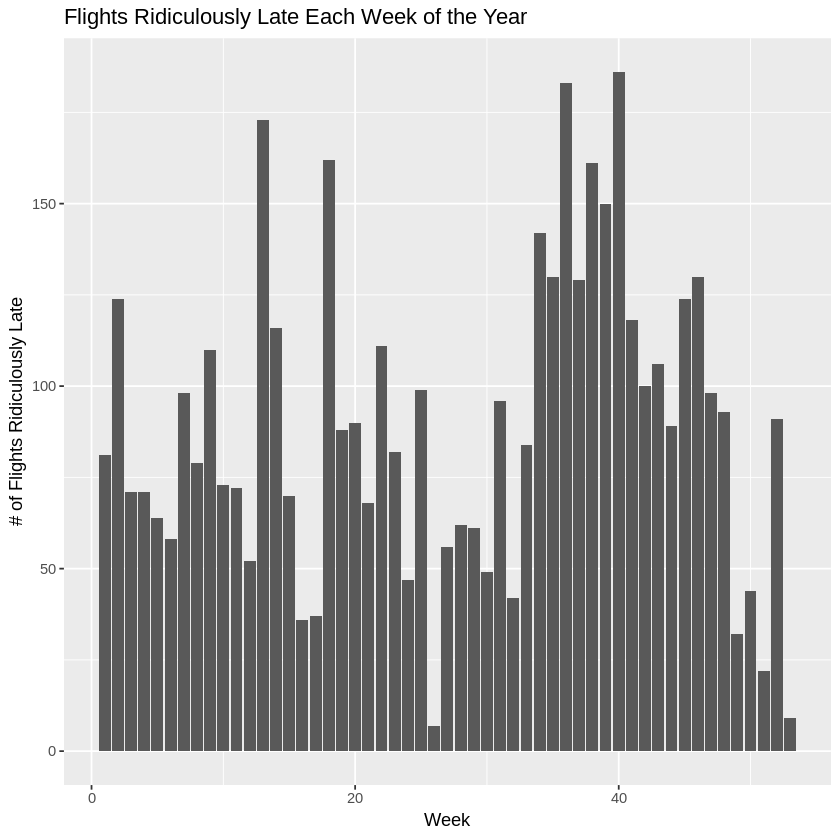

In [59]:
ggplot(table5) +
  geom_bar(aes(week, n_ridiculously_late), stat = "identity") +
  labs(x = "Week", y = "# of Flights Ridiculously Late") +
  ggtitle("Flights Ridiculously Late Each Week of the Year")


#### Problem 7
Your plot in problem 6 should have a curious feature: in a couple of weeks there were far fewer ridiculously late flights than the rest. 
- Investigate this further by determining the fraction of arrival delays which were missing in each week. For example, in week 1, 0.92% of flights had missing arrival delay times.
- Additionally, rank each week by this fraction. The week with the highest fraction of missing arrival delay times should have rank one, second highest rank two, and so on.

Store the result in a variable called `table7`. 
Your table should have three columns: `week`, `frac_miss_arr_delay` and `rank`.

In [61]:
 table7 <- flights_week %>%
  group_by(week) %>%
  summarize(frac_miss_arr_delay = sum(is.na(arr_delay)) / n()) %>%
  mutate(rank = min_rank(desc(frac_miss_arr_delay))) %>%
  arrange(rank)
table7

week,frac_miss_arr_delay,rank
6,0.165874447,1
26,0.080323692,2
10,0.079096045,3
50,0.068278135,4
49,0.063144733,5
21,0.055529037,6
37,0.048192771,7
28,0.047231270,8
16,0.047186933,9
5,0.044301713,10


In [ ]:
stopifnot(exists("table7"))

#### Problem 8
For the week with the highest fraction of missing arrival times in problem 6, generate a table `table8` which shows the total number of missing arrival delays for each hour and day of that week. Your table should have columns `year`, `month`, `day`, `hour`, and `n_miss_arr_delay`.

In [62]:
table8 <- flights_week %>%
  filter(week == 6) %>%
  group_by(year, month, day, hour) %>%
  summarize(n_miss_arr_delay = sum(is.na(arr_delay))) %>%
  select(year, month, day, hour, n_miss_arr_delay)
table8

year,month,day,hour,n_miss_arr_delay
2013,2,5,5,0
2013,2,5,6,1
2013,2,5,7,1
2013,2,5,8,1
2013,2,5,9,3
2013,2,5,10,0
2013,2,5,11,0
2013,2,5,12,2
2013,2,5,13,1
2013,2,5,14,0


In [ ]:
stopifnot(exists("table8"))

#### Problem 9
Two days in `table8` should stand out from the rest. To figure out what is going on, we will join in some weather data from the `weather` table. Since we have not yet covered joins, this table is provided for you:

In [63]:
table9 = weather %>% filter(origin=="LGA") %>% left_join(table8, .)
print(table9)

Joining, by = c("year", "month", "day", "hour")


# A tibble: 133 x 16
# Groups:   year, month, day [?]
    year month   day  hour n_miss_arr_delay origin  temp  dewp humid wind_dir
   <dbl> <dbl> <int> <dbl>            <int> <chr>  <dbl> <dbl> <dbl>    <dbl>
 1  2013     2     5     5                0 LGA     30.0  14    50.8      210
 2  2013     2     5     6                1 LGA     28.9  19.0  66.1      200
 3  2013     2     5     7                1 LGA     28.9  21.9  74.7      200
 4  2013     2     5     8                1 LGA     28.4  21.2  74.1      190
 5  2013     2     5     9                3 LGA     28.9  24.1  81.8        0
 6  2013     2     5    10                0 LGA     28.4  24.8  86.2       50
 7  2013     2     5    11                0 LGA     28.4  23    79.9       50
 8  2013     2     5    12                2 LGA     28.4  23    79.9       40
 9  2013     2     5    13                1 LGA     28.4  23    79.9       40
10  2013     2     5    14                0 LGA     28.9  23    78.2       30
# ... with

Define a new variable `snowfall` in table 9, which is equal to hourly precipitation (in millimeters) if the temperature is below 40 degrees Fahrenheit in that hour, and zero otherwise.

Use `table9` to generate two plots: 

1. A bar plot of total snowfall for each day of the week in question, and
2. A line showing the total number of flights with missing arrival times for each day.

Store these plots in variables `p1` and `p2`, respectively, and use the following command to combine them:

```{r}
gridExtra::grid.arrange(p1, p2, nrow=2)
```

Your final plot should look like this:

![problem 9](p9.png)

Warning message:
“Ignoring unknown aesthetics: stat”

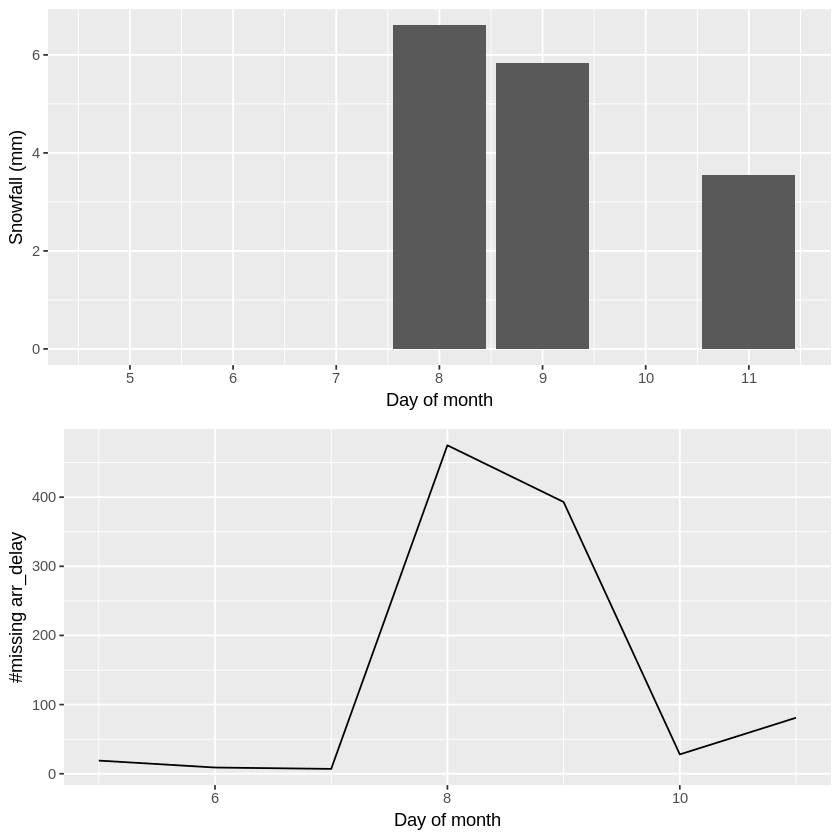

In [64]:
new_table = table9 %>% mutate(snowfall = ifelse(temp < 40, precip*25.4, 0))

snowfall_table = new_table %>% group_by(day) %>% summarize(total_snowfall = sum(snowfall))

flightboys_table = new_table %>% group_by(day) %>% summarize(missing_arr_delay = sum(n_miss_arr_delay))

p1 = ggplot(data = snowfall_table) + 
    geom_bar(mapping = aes(x = day, y = total_snowfall), stat = "identity") +
    xlab("Day of month") + ylab("Snowfall (mm)") + scale_x_continuous(breaks = seq(5,11))

p2 = ggplot(data = flightboys_table) +
        geom_line(mapping = aes(x = day, y = missing_arr_delay, stat = "identity")) +
    xlab("Day of month") + ylab("#missing arr_delay")

gridExtra::grid.arrange(p1,p2,nrow=2)


#### Problem 10
In your own words, summarize your findings from problems 8-10. What do `NA`s for arrival and departure delay likely represent in these data?